In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg
from scipy import ndimage,stats,signal
import time

# LAB 10 - Sampling, Reconstruction

## DUE:  22 March 2024 @ 11.59pm

## NAME: Anastasia Horne $\hspace{2.5in}$                                 STUDENT NUMBER: 10867499

The purpose of this lab is to give you practice with regular and irregular digital sampling and "analog" reconstruction.

Note: You must show your numerical work, and your computations must be reproducible either as a number of short python codes or (preferrably) in a single Jupyter Notebook! **Please include a PDF version of your assignment to help out the TA with the grading process.**

## Q1: Sampling "Continuous" Signals

This question examines how you approach subsampling of a signal, and what are the consequences of not following the recommended approach.

**Q1-1:** **Visualizing Aliasing** Create a 1000-point signal at a 1000Hz sampling rate (i.e., $\Delta t=$0.001 s) that is defined by the following  25 Hz and 75 Hz sinusoids:

$$x(t) = \mathrm{cos}\left(25\times 2\pi t\right) +  2\mathrm{cos}\left(75\times 2\pi t\right) $$

According to the Nyquist-Shannon sampling theorem, we know that the highest recoverable frequency (i.e., the Nyquist frequency) is at 500 Hz.  Let's look at what happens when we just subsample the time series while being whimsicle about the underlying frequency content.  Make a plot of the time series and the associated Fourier magnitude spectra when you take every: 

* 5th sample
* 8th sample
* 10th sample

Describe what happens to the spectral content as you progressively subsample without apply any anti-aliasing filters.

Text(0.5, 0, 'Frequency (Hz)')

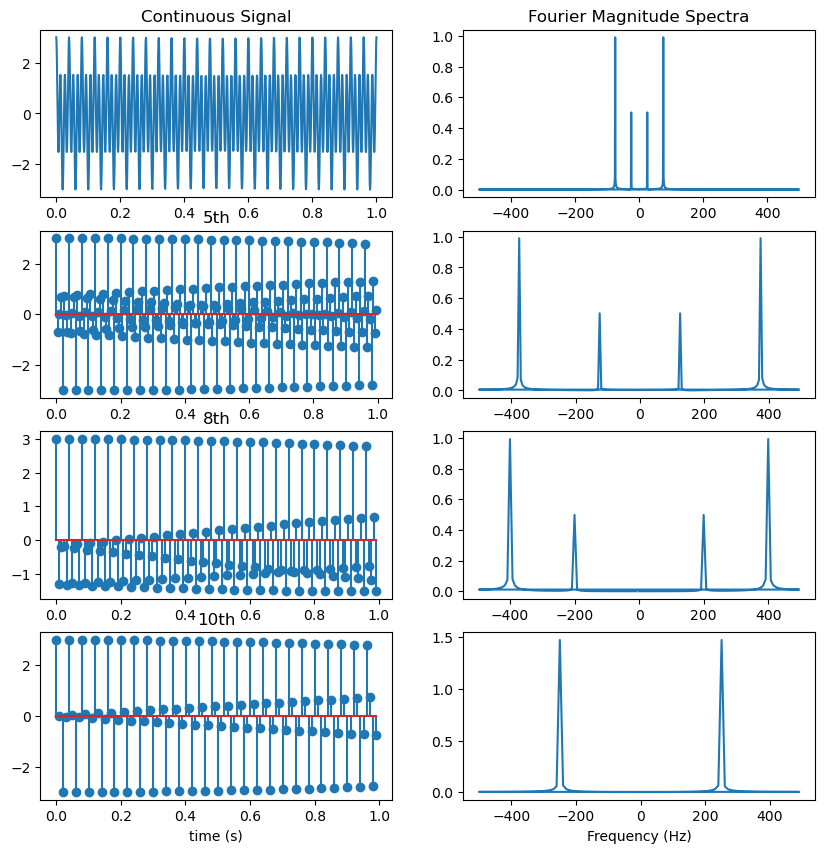

In [2]:
# . . Your response to Q1-1 goes here
#define the continuous signal
tfreq=0.001
time=np.linspace(0, 1, 1000)
signal=np.cos(25 * 2 * np.pi*time) + 2* np.cos(75 * 2 * np.pi*time)

#sample the signal to a discrete one
disc5= signal[::5]
disc8= signal[::8]
disc10= signal[::10]

#calc thr Fourier Mag Spectra

sigFFT= np.fft.fft(signal)/1000
FFT5=np.fft.fft(disc5)/len(disc5)
FFT8=np.fft.fft(disc8)/len(disc8)
FFT10=np.fft.fft(disc10)/len(disc10)

magSig= np.abs(sigFFT)
mag5= np.abs(FFT5)
mag8= np.abs(FFT8)
mag10= np.abs(FFT10)

freqSig = np.fft.fftfreq(len(signal), d=1/1000)
freq5 = np.fft.fftfreq(len(disc5), d=1/1000)
freq8 = np.fft.fftfreq(len(disc8), d=1/1000)
freq10 = np.fft.fftfreq(len(disc10), d=1/1000)

#plot the signal and Fourier Magnitude spectra
fig, axs = plt.subplots(4, 2, figsize=(10, 10))

axs[0,0].plot(time, signal)
axs[0,0].set_title("Continuous Signal")
axs[0,1].plot(freqSig, magSig)
axs[0,1].set_title("Fourier Magnitude Spectra")

axs[1,0].stem(time[::5], disc5)
axs[1,0].set_title("5th")
axs[1,1].plot(freq5, mag5)

axs[2,0].stem(time[::8], disc8)
axs[2,0].set_title("8th")
axs[2,1].plot(freq8, mag8)

axs[3,0].stem(time[::10], disc10)
axs[3,0].set_title("10th")
axs[3,0].set_xlabel('time (s)')
axs[3,1].plot(freq10, mag10)
axs[3,1].set_xlabel("Frequency (Hz)")

#5 -> 200 Hz
#8 -> 125 Hz
#10 -> 100 Hz

As our sampling rate decreases (move further down our graphs), we see that our spectral content begins to spread out across our frequency domain. We see that all the sampled signals show aliasing and it gets progressively worse as we decrease the rate. We also see that our larger freqency values combined with the smaller-freqencies for the 'every 10th sample'. 

**Q1-2:** **Predicting Aliasing** - Given your experience in Q1-1, derive an mathematical expression that predicts where the aliased 75 Hz signal will fall on the spectrum for all subsampling integers $n=[7,8,9,10,11,12]$.

In [3]:
# . . Your response to Q1-2 goes here
#aliased point frequency= f-n*Fs
f=75
n=[7,8,9,10,11,12]
Fs=[]
for i in n:
    Fs.append(1000/i)


for fa,i in zip(Fs,n):
    print("For n= ",i, " we have aliased freq = ", fa )


For n=  7  we have aliased freq =  142.85714285714286
For n=  8  we have aliased freq =  125.0
For n=  9  we have aliased freq =  111.11111111111111
For n=  10  we have aliased freq =  100.0
For n=  11  we have aliased freq =  90.9090909090909
For n=  12  we have aliased freq =  83.33333333333333


**Q1-3:** Your boss doesn't like sampling at 1000Hz (thinks it's wasteful!) and asks to you resample the data from Q1-1 to 180 Hz so that it doesn't waste valuable space on your system's resources.  Devise and implement a procedure to complete the subsampling of the original data at 180 Hz.  (Hint: Look at the "Practial Fourier Sampling" section at the end of the Digital Sampling and Reconstruction notes.)

<StemContainer object of 3 artists>

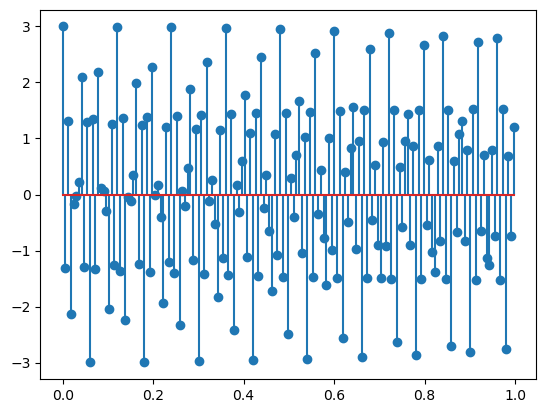

In [4]:
# . . Your response to Q1-3 goes here
#t1f1=t2f2
#f1/N1=f2/N2 !!!!!!
#we see the signal rations must match-
#N2=f2*N1/f1


#t1=0.0001, 
#f1=1/2*sr, f2=180

N2=(180*1000)/1000
sampRate=1000/N2
#we can't sample every 5.55556 values, so we will round up to 6

newSig1= signal[::6]

plt.stem(time[::6], newSig1)


**Q1-4:** Your boss still isn't satisfied with your data compression efforts, is generally indifferent about any signals above 50 Hz, and now wants the original data from Q1-1 resampled at 100 Hz.  Devise and implement a procedure to compute the **unaliased** components of the signal at a 100 Hz sampling rate.

<StemContainer object of 3 artists>

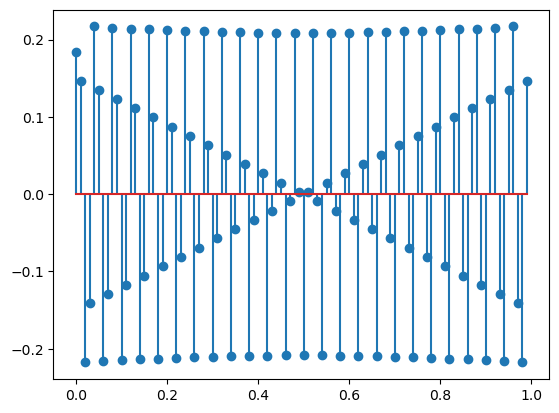

In [5]:
# . . Your response to Q1-4 goes here
#we will remove any frequencies above 50 Hz and apply a low-pass filter to avoid aliasing
hits=int(1000/50)
filter1=np.ones(hits)/(hits)
filtSig=np.convolve(signal, filter1, mode='same')

#sample at 100 Hz
df=int(1000/100)
newSig2=filtSig[::df]

plt.stem(time[::df], newSig2)

## Q2: Reconstructing Signals

Let's now look at upsampling a signal to a higher sampling rate.

**Q2-1:** **Time-domain interpolation** - Create a 200-point signal at a 200Hz sampling rate (i.e., $\Delta t=0.005$ s) that is defined by the following sinusoids at 25 Hz and 75 Hz:

$$x(t) = \mathrm{cos}\left(25\times2\pi t\right) + 2\mathrm{cos}\left(75\times 2\pi t\right) $$

Let's now look at how we can interpolate the function in the time domain.  Write a routine to perform (time-domain) **sinc interpolation** of the signal so that it has an equivalent output at a 1000 Hz sampling rate.

Should be 200:  200
Should be 1000:  1000


Text(0.5, 1.0, '(c) Reconstructed signal - $x_r(t)$')

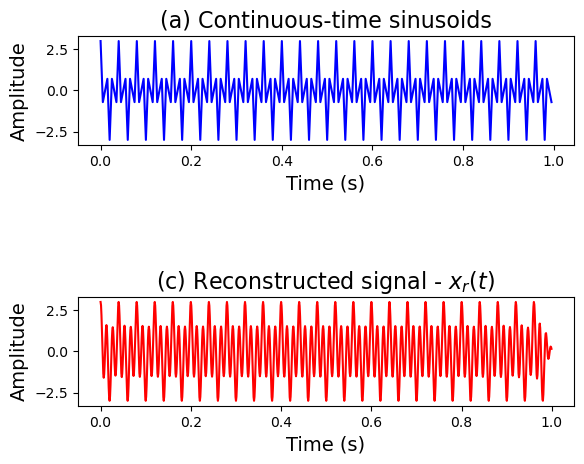

In [6]:

nmin,nmax,sfreq=0.0,1,200.
T=1./sfreq

# . . Make a linear array starting at tmin going to tmax with nt points
nn = np.arange(nmin,nmax,T)
tt = np.arange(nmin,nmax,T/5)
signal2=np.cos(25 * 2 * np.pi*nn) + 2* np.cos(75 * 2 * np.pi*nn)

print("Should be 200: ",len(signal2))
## . . Let's reconstruct the "continuous" from the discretely sampled
reconsignal = np.zeros(len(tt))
print("Should be 1000: ", len(reconsignal))
# . . Reconstruct according to the above sinc interpolation formula
# . . Note the implict second loop over time variable tt
for kk in range(0,len(nn)-1):
    reconsignal += signal2[kk]*np.sinc((tt-kk*T)/T) 

# . . Now let's plot the results
plt.subplot(311)
plt.plot(nn,signal2,'b')
plt.xlabel('Time (s)',fontsize=14)
plt.ylabel('Amplitude',fontsize=14)
plt.title('(a) Continuous-time sinusoids',fontsize=16)

plt.subplot(313)
plt.plot(tt,reconsignal,'r')
plt.xlabel('Time (s)',fontsize=14)
plt.ylabel('Amplitude',fontsize=14)
plt.title('(c) Reconstructed signal - $x_r(t)$',fontsize=16)


**Q2-2: Fourier-domain Interpolation** - Sampling in the frequency domain can be made finer (i.e., effectively interpolate the spectral content) through the process of zero padding of time-domain signals. This approach effectively appends a sequence of zero values to the end of your input array, which results in a finer $\Delta \omega$ (see "Practical Fourier Sampling" section at end of Digital Sampling notes). The zero-padding approach also works in frequency domain to recover more finely sampled signals (i.e., interpolated) in the time domain. Let's look at how we can do this by upsampling a signal from $f_{1,max}$=200 Hz to $f_{2,max}$=1000 Hz.

(a) Take the Fourier transform $\widehat{X}(\omega)$ of the signal from Q2-1 that we sampled at 200 Hz.

(b) Initialize a frequency-domain array that is 5$\times$ longer than $\widehat{X}(\omega)$ from part (a). This is because you want to go from 200 Hz to 1000 Hz, which is 5$\times$ higher sampling frequency.  It is best to use the *np.zeros* command ... but remember to include the option *dtype=np.complex* so that it creates a complex numpy array.

(c) Prepend and append 2.5$\times$ zero samples on either side of your computed $\widehat{X}(\omega)$.  Remember that you'll have to use *np.fft.fftshift* in order to get the array in the correct order from -$f_{max}$ to +$f_{max}$, and then apply *np.fft.fftshift* again to get it back ready for the *np.fft.ifft*.

(d) Compute the *np.fft.ifft* of the signal to recover $x_{1000 Hz}(t)$.

(e) Rescale the result of (d) by 5 to preserve amplitudes.

Include representative plots to illustrate the results.

C:\Users\anast\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\anast\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


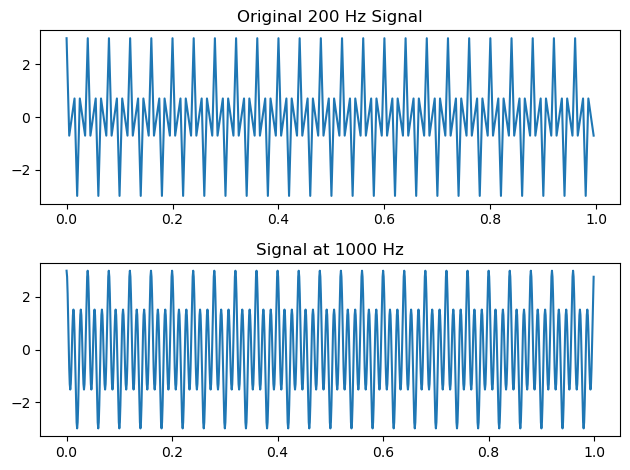

In [7]:
# . . Your response to Q2-2 goes here
#a
X= np.fft.fft(signal2)

#b
freDom= np.zeros(5*len(X), dtype=np.csingle)

#c
X=np.fft.fftshift(X)

Xpad= np.pad(X, (int(2*len(X)), int(2*len(X))))

#d
recovSig=np.fft.ifft(np.fft.fftshift(Xpad))

#e
recovSig *= 5

#plots
plt.subplot(211)
plt.plot(nn, signal2)
plt.title("Original 200 Hz Signal")

plt.subplot(212)
plt.plot(tt, recovSig)
plt.title("Signal at 1000 Hz")

plt.tight_layout()
plt.show()